In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy import stats
from scipy.stats import linregress

In [50]:

url = 'https://raw.githubusercontent.com/ForgetfulVegan/Project-Snake/marek/branching_exercise/wine_csv.csv'
df = pd.read_csv(url, index_col=0)
df.head()
# df.head()

,appellation,appellation_slug,classification,color,confidence_index,country,date,is_primeurs,journalist_count,lwin,lwin_11,regions,score,vintage,wine,wine_id,wine_slug,wine_type
index,,,,,,,,,,,,,,,,,,
0,Chianti Classico Gran Selezione,chianti-classico-gran-selezione,NaN,Red,A+,Italy,2019-06-15,False,5,NaN,NaN,['Tuscany'],93.59,2015,"Marchesi Antinori, Badia a Passignano, Chianti...",147377,marchesi-antinori-badia-a-passignano-chianti-c...,NaN
1,Chateauneuf Du Pape,chateauneuf-du-pape,NaN,Red,B+,France,2019-06-15,False,5,1113130.0,1.113130e+10,['Rhone'],90.68,2015,"E. Guigal, Chateauneuf Du Pape",68461,e-guigal-chateauneuf-du-pape,NaN
2,Saint Emilion Grand Cru,saint-emilion-grand-cru,NaN,Red,B+,France,2019-06-15,False,9,NaN,NaN,['Bordeaux'],89.85,2016,"Chateau Montlabert, Saint Emilion Grand Cru",39471,chateau-montlabert-saint-emilion-grand-cru,NaN
3,Haut Medoc,haut-medoc,Cru Bourgeois,Red,B,France,2019-06-15,False,7,NaN,NaN,['Bordeaux'],89.09,2016,"Chateau Larose Trintaudon, Haut Medoc",38120,chateau-larose-trintaudon-haut-medoc,NaN
4,Puisseguin Saint Emilion,puisseguin-saint-emilion,NaN,Red,C+,France,2019-06-15,False,3,NaN,NaN,['Bordeaux'],88.52,2016,"Vignobles Lannoye, Chateau Lanbersac, Puissegu...",140096,vignobles-lannoye-chateau-lanbersac-puisseguin...,NaN


In [51]:
#new table with data needed
score_count = df[["journalist_count", "score", "color"]]
score_count.head()

,journalist_count,score,color
index,,,
0,5,93.59,Red
1,5,90.68,Red
2,9,89.85,Red
3,7,89.09,Red
4,3,88.52,Red


In [52]:
#Convert string to integer in color column
color= {'Red': 1, 'White': 2, 'Pink': 3}
#iterate through color column to convert
score_count.color= [color[item] for item in score_count.color]
print(score_count)

       journalist_count  score  color
index                                
0                     5  93.59      1
1                     5  90.68      1
2                     9  89.85      1
3                     7  89.09      1
4                     3  88.52      1
5                     4  88.48      1
6                     7  88.22      1
7                     6  88.06      1
8                    11  87.66      1
9                     7  87.47      1
10                    3  86.72      1
11                    7  86.40      1
12                    5  96.30      1
13                    3  95.63      1
14                    4  95.45      1
15                    6  95.15      1
16                    4  93.14      1
17                    3  92.97      1
18                    5  92.95      1
19                    3  92.93      1
20                    3  92.48      1
21                    5  92.31      1
22                   19  91.51      1
23                    3  90.85      1
24          

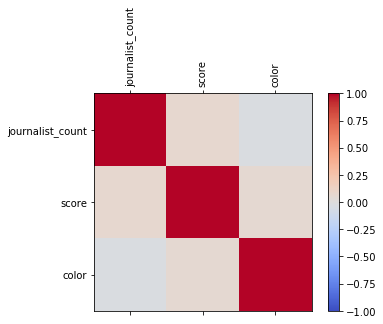

<Figure size 432x288 with 0 Axes>

In [69]:
#find correlation between variable using corr matrix
corr = score_count.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(score_count.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(score_count.columns)
ax.set_yticklabels(score_count.columns)
plt.show()
plt.savefig("fig1.png")

In [70]:
#Assign columns variable names for plotting
score = score_count.iloc[:, 1]
journalist_count= score_count.iloc[:, 0]
all_color= score_count.iloc[:, 2]

(slope, intercept, _, _, _) = linregress(journalist_count, score)
fit = slope * journalist_count + intercept
sc_p

2.2341402282339895e-40

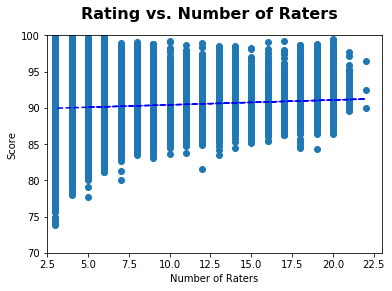

In [74]:
#Across all the regions, does the rating correlate with the count (scatter + regression)
#Plotting but the above matrix shows me that there is no correlation between the journalist count and score given, since it is equal to 0.
fig, ax = plt.subplots()

fig.suptitle("Rating vs. Number of Raters", fontsize=16, fontweight="bold")

ax.set_xlim(2.5, 23)
ax.set_ylim(70, 100)

ax.set_xlabel("Number of Raters")
ax.set_ylabel("Score")


ax.plot(journalist_count, score, linewidth=0, marker='o')
ax.plot(journalist_count, fit, 'b--')
plt.savefig("scatterplotratervsscore.png")
plt.show()

In [34]:
#find average score/ average journalist count of red, white, and pink wines to see "statistically better"
mean_score_count= score_count.groupby("color").mean()
mean_score_count

,journalist_count,score
color,,
1,5.778391,90.041722
2,5.500768,90.611404
3,4.464286,91.213482


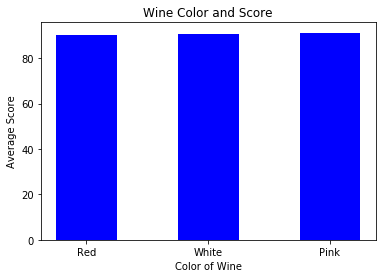

In [35]:
#rename colors back to strings
#bar chart variable
w= .5
color_wine = ["Red", "White", "Pink"]
score_wine= [90.04, 90.61, 91.21]
numjourn= [5.78, 5.5, 4.46]
#bar chart wine color/score
by_color= plt.bar(color_wine, score_wine, width= w, color="b", align="center")
plt.title("Wine Color and Score")
plt.xlabel("Color of Wine")
plt.ylabel("Average Score")
plt.savefig("fig3.png")
# Make some labels.



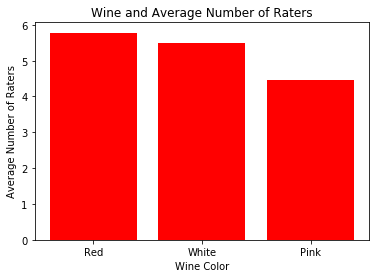

In [36]:
#show the average number of judges for each color of wine
by_njourn= plt.bar(color_wine, numjourn, color="r", align="center")
plt.title("Wine and Average Number of Raters")
plt.xlabel("Wine Color")
plt.ylabel("Average Number of Raters")
plt.savefig("fig4.png")